In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cancer_data = pd.read_csv('cancer_data.csv')
cancer_data = cancer_data.drop(columns = ['Unnamed: 0'])
cancer_data = cancer_data.iloc[:, :12]
cancer_data.head()

,diagnosis,children,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,Yes,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,No,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,Yes,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,No,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,Yes,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


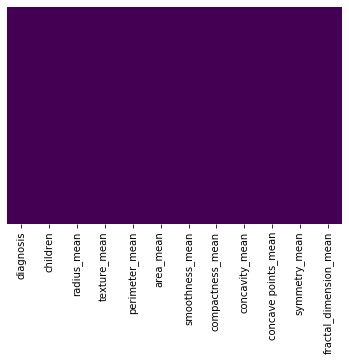

In [2]:
#Check if is there any null data
sns.heatmap(cancer_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') # Check the NA

In [3]:
children = pd.get_dummies(cancer_data['children'], drop_first = True)
diagnosis = pd.get_dummies(cancer_data['diagnosis'], drop_first = True)
cancer_data = pd.concat([diagnosis,cancer_data, children], axis = 1)
cancer_data = cancer_data.iloc[:,[0,3,6,7,8,9,10,11,12, 13]]
cancer_data = cancer_data.rename(columns = {'Yes':'Child', 'M':'Diagnosis'})
cancer_data.head()

,Diagnosis,radius_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Child
0,1,17.99,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,1,20.57,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,1,19.69,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,1,11.42,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,1,20.29,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [4]:
X = cancer_data.iloc[:, 1:]
y = cancer_data.iloc[:,0]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
print("Training size: %d" %len(y_train))
print("Test size    : %d" %len(y_test))

Training size: 455
Test size    : 114


In [6]:
#Fitting Random Forest Classification to the training set
from sklearn.ensemble import RandomForestClassifier 
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

start = time.time()

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
scores = cross_val_score(classifier, X, y)

end = time.time()


In [9]:
accuracy_all = accuracy_score(y_test, y_pred)

print("Random Forest Accuracy: {0:.2%}".format(accuracy_all))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


Random Forest Accuracy: 92.11%
Cross validation score: 93.15% (+/- 6.69%)
Execution time: 0.30007 seconds 



In [8]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))


[[71  1]
 [ 8 34]]


              precision    recall  f1-score   support

           0       0.90      0.99      0.94        72
           1       0.97      0.81      0.88        42

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114



# Optimization

In [13]:
from sklearn.model_selection  import GridSearchCV
RF_params = {'n_estimators':[1, 10,50,100], 'criterion':['gini', 'entropy']}
grid = GridSearchCV(RandomForestClassifier(), RF_params, scoring = 'accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [11]:
grid.best_params_

{'criterion': 'gini', 'n_estimators': 50}

In [12]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
#Fitting Random Forest Classification to the training set
from sklearn.ensemble import RandomForestClassifier 
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

start = time.time()
classifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
scores = cross_val_score(classifier, X, y)
end = time.time()


In [18]:
accuracy_all = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {0:.2%}".format(accuracy_all))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


Random Forest Accuracy: 92.98%
Cross validation score: 93.32% (+/- 5.27%)
Execution time: 0.82992 seconds 



In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[70  2]
 [ 6 36]]


              precision    recall  f1-score   support

           0       0.92      0.97      0.95        72
           1       0.95      0.86      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

